/tmp/ipykernel_1115239/4263079708.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('rainbow')
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family '

['HSCg', 'HSC_bands/HSC.g_filter.dat', 'g']
['HSCr', 'HSC_bands/HSC.r_filter.dat', 'r']
['HSCi', 'HSC_bands/HSC.i_filter.dat', 'i']
['HSCz', 'HSC_bands/HSC.z_filter.dat', 'z']
['HSCY', 'HSC_bands/HSC.Y_filter.dat', 'Y']


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


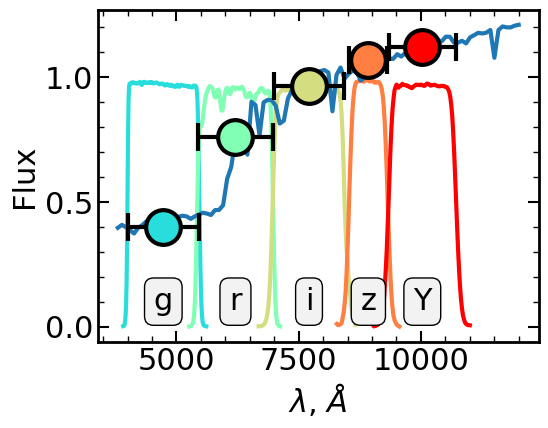

[0.49387579 3.87559722 1.         0.008     ]


In [37]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib

cmap = matplotlib.cm.get_cmap('rainbow')


font = {'size'   : 22}

matplotlib.rc('font', **font)

id_run = '20260103185816'
weight_path = "/data/kirg/MMVAE/cigale/" + id_run + "/"


tr_smpl = os.path.join(weight_path, 'train_dataset_cigale_tmpl.fits')


t_train = Table.read(tr_smpl)

ii = 3
sed = 1.12*t_train['SED'][ii]
wl = np.linspace(3800, 12000, 100)
spec = t_train['Spec'][ii]
plt.plot(wl, spec, linewidth=3)


filters = [
    ['HSCg', 'HSC_bands/HSC.g_filter.dat', 'g'],
    ['HSCr', 'HSC_bands/HSC.r_filter.dat', 'r'],
    ['HSCi', 'HSC_bands/HSC.i_filter.dat', 'i'],
    ['HSCz', 'HSC_bands/HSC.z_filter.dat', 'z'],
    ['HSCY', 'HSC_bands/HSC.Y_filter.dat', 'Y']
]



ax = plt.gca()

bbox = dict(boxstyle="round", fc="0.95")

for i, fl in enumerate(filters):
    print(fl)
    t = Table.read(fl[1], format='ascii.no_header')
    mean_lam = np.nansum(t['col1'] * t['col2']) / np.nansum(t['col2'])
    l = t['col1'][t['col2'] > 0.5]
    filt_width = np.nanmax(l) - np.nanmin(l)
    plt.plot(t['col1'], t['col2'], color=cmap((i + 2)/ 6.0), linewidth=3, zorder=-32)
    plt.errorbar(mean_lam, sed[i] , xerr=filt_width/2, 
                 ecolor='black', elinewidth=3, 
                 capsize=10, capthick=3)
    plt.plot(mean_lam, sed[i], 
             color=cmap((i + 2)/ 6.0), 
             marker='o',
             markersize=25,
             markeredgewidth=3,
             markeredgecolor='black')
    ax.annotate(filters[i][2],
        xy=(8000, 0),
        xytext=(mean_lam, 0.1),
        bbox=bbox,
        ha='center', va='center')
    #sed_lam.append(wlbb / 1e4)
    #sed_fl.append(3.5*flbb*scale_sed)





for spine in ax.spines.values():
    spine.set_linewidth(2)


# Turn on minor ticks
ax.minorticks_on()

# Major ticks
ax.tick_params(axis='both', which='major',
               direction='in',
               length=8, width=1.5,
               top=True, right=True)

# Minor ticks
ax.tick_params(axis='both', which='minor',
               direction='in',
               length=4, width=1,
               top=True, right=True)



plt.xlabel(r'$\lambda$, $\AA$')
plt.ylabel('Flux')

plt.tight_layout()
plt.savefig('train_rec_exmpl.pdf')

plt.show()

print(t_train['Param'][ii])


In [4]:
t_train

SED,Param,Spec
float64[5],float64[4],float64[100]
0.5676225389551565 .. 0.9998270937947679,1.2241763426771253 .. 0.02,1.0648317325095986 .. 1.9064011737159758
0.5722909957229283 .. 0.9988930865488473,0.5229574740058076 .. 0.02,0.5891200415068581 .. 1.0278814392866606
0.8602216087232197 .. 0.9653571623892214,1.0813948911263174 .. 0.008,1.103897310933929 .. 1.1479308070577203
0.3564312488873523 .. 1.0002219847480576,0.4938757894619969 .. 0.008,0.39606694732658015 .. 1.2103306488629013
0.8229945541488469 .. 0.8862218707355751,0.33680141587935536 .. 0.05,0.8880915223669044 .. 1.0676189404776817
0.6154841087295023 .. 0.9875792025623327,1.0521581004586462 .. 0.05,0.9375771920840458 .. 1.591285362100073
0.4815615975395267 .. 0.999969470717364,0.26458891573171145 .. 0.02,0.43663281057240466 .. 1.2364869436936834
0.5407656236102628 .. 0.8893964826761436,0.7430626129158948 .. 0.05,0.5712650663046626 .. 1.0157770195829832
0.4920662738535734 .. 1.0016632957043405,0.3956834711954959 .. 0.05,0.47695306922452324 .. 1.0906752209188935
